In [1]:
import missingno as msno
from funciones.preprocessing import *
from funciones.evaluation import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from imblearn.over_sampling import SMOTE
from scikitplot.metrics import plot_roc
import warnings

warnings.filterwarnings('ignore')
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data = pd.read_csv('data/final.csv', sep=';')
data.columns = [i.lower() for i in data.columns]
data.columns = [i.replace(' ', '_') for i in data.columns]
data['no_financiera'] = data['no_financiera'].fillna(data['no_financiera'].median())
data = data.fillna(0)
data.head(3).append(data.tail(3))

,id,f_analisis,var_rpta,segmento,2018,2017,2015,2016,m2,m1,m12,m11,m10,m9,m3,m4,m7,m8,m6,m5,wd5,wd4,wd3,wd2,wd0,wd1,wd6,no_financiera,mean_actualizaciones,mean_aperturaproductos,mean_compras,mean_pagos,mean_recargas,mean_transferencias,mean_utilizacion_de_cupo_de_credito,sum_actualizaciones,sum_aperturaproductos,sum_compras,sum_pagos,sum_recargas,sum_transferencias,sum_utilizacion_de_cupo_de_credito,count_actualizaciones,count_aperturaproductos,count_compras,count_pagos,count_recargas,count_transferencias,count_utilizacion_de_cupo_de_credito
0,1,201803,0,4,75.00,163.00,0.00,0.00,33.00,42.00,42.00,30.00,35.00,22.00,4.00,2.00,16.00,4.00,8.00,0.00,43.00,43.00,51.00,23.00,45.00,9.00,24.00,182.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,201604,0,0,0.00,0.00,2.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,201608,0,5,0.00,0.00,0.00,8.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00,0.00,0.00,0.00,2.00,0.00,0.00,6.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
37997,37998,201602,0,5,0.00,0.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00,0.00,0.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
37998,37999,201602,0,5,0.00,0.00,3.00,2.00,0.00,2.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,2.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
37999,38000,201612,0,5,0.00,0.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,5.00,0.00,2.00,0.00,0.00,0.00,0.00,5.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
data.columns

Index(['id', 'f_analisis', 'var_rpta', 'segmento', '2018', '2017', '2015',
       '2016', 'm2', 'm1', 'm12', 'm11', 'm10', 'm9', 'm3', 'm4', 'm7', 'm8',
       'm6', 'm5', 'wd5', 'wd4', 'wd3', 'wd2', 'wd0', 'wd1', 'wd6',
       'no_financiera', 'mean_actualizaciones', 'mean_aperturaproductos',
       'mean_compras', 'mean_pagos', 'mean_recargas', 'mean_transferencias',
       'mean_utilizacion_de_cupo_de_credito', 'sum_actualizaciones',
       'sum_aperturaproductos', 'sum_compras', 'sum_pagos', 'sum_recargas',
       'sum_transferencias', 'sum_utilizacion_de_cupo_de_credito',
       'count_actualizaciones', 'count_aperturaproductos', 'count_compras',
       'count_pagos', 'count_recargas', 'count_transferencias',
       'count_utilizacion_de_cupo_de_credito'],
      dtype='object')

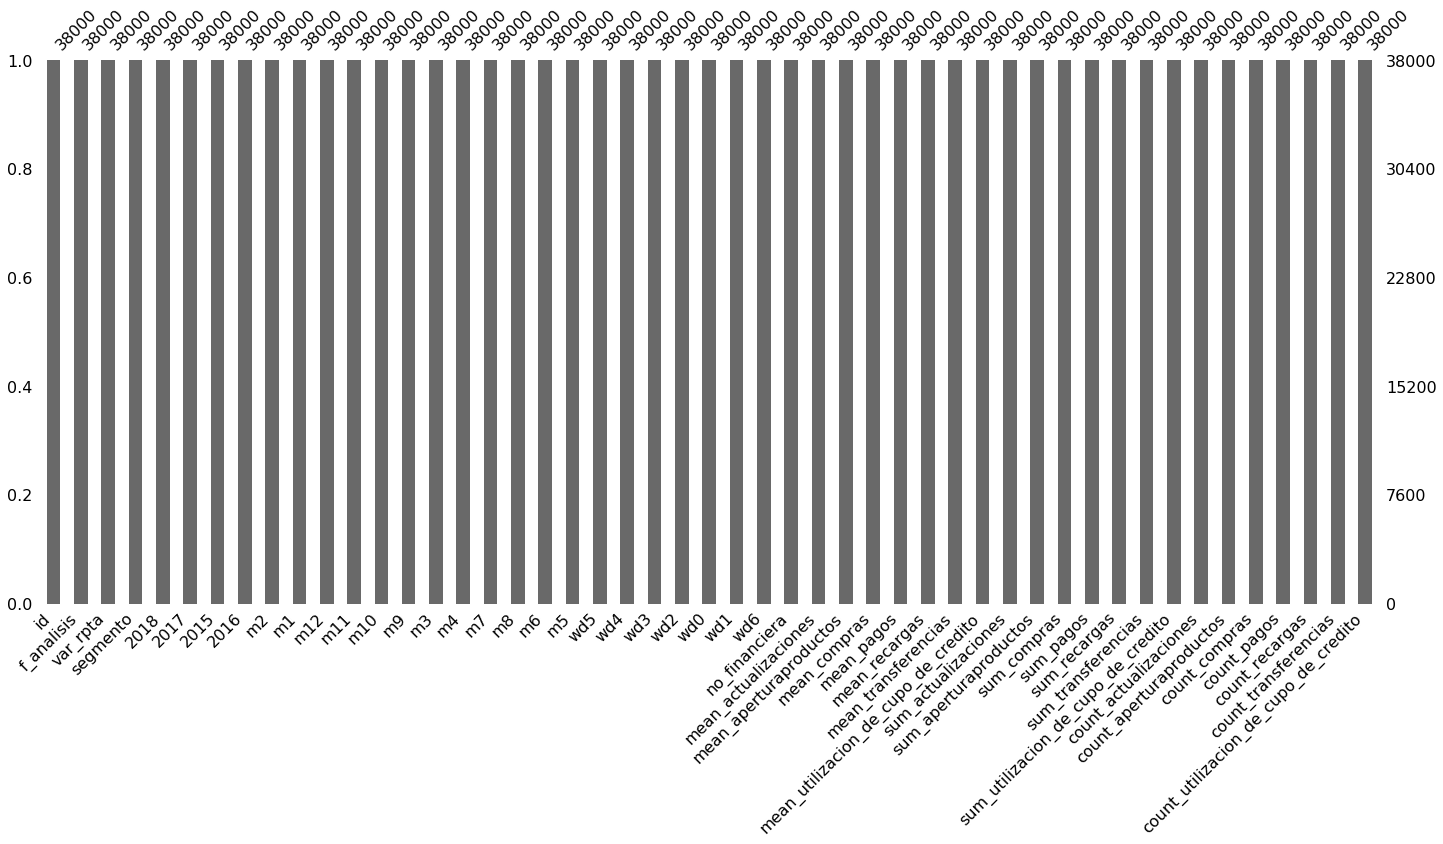

In [4]:
msno.bar(data)

In [5]:
data.describe()

,id,f_analisis,var_rpta,segmento,2018,2017,2015,2016,m2,m1,m12,m11,m10,m9,m3,m4,m7,m8,m6,m5,wd5,wd4,wd3,wd2,wd0,wd1,wd6,no_financiera,mean_actualizaciones,mean_aperturaproductos,mean_compras,mean_pagos,mean_recargas,mean_transferencias,mean_utilizacion_de_cupo_de_credito,sum_actualizaciones,sum_aperturaproductos,sum_compras,sum_pagos,sum_recargas,sum_transferencias,sum_utilizacion_de_cupo_de_credito,count_actualizaciones,count_aperturaproductos,count_compras,count_pagos,count_recargas,count_transferencias,count_utilizacion_de_cupo_de_credito
count,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00,38000.00
mean,19000.50,201692.05,0.07,3.43,41.67,226.59,52.21,207.59,42.24,42.99,54.35,46.39,46.72,47.29,39.35,41.26,42.12,41.24,45.48,38.63,93.30,81.19,89.57,57.52,91.91,29.59,84.97,365.48,0.00,20282.33,18926.32,52294.63,346.16,1081649.25,29950.98,0.00,93704.91,396995.76,692922.00,4443.99,34145234.45,186451.42,0.01,0.01,5.96,1.22,0.68,15.04,0.06
std,10969.80,73.07,0.26,1.94,184.86,553.81,174.03,474.71,79.26,78.57,96.66,84.97,85.36,88.17,84.41,84.55,84.84,80.66,86.94,81.76,157.52,136.10,155.06,105.29,156.57,52.97,145.24,588.41,0.00,1129447.79,175894.14,1251697.20,2217.05,27331552.81,1222560.62,0.00,6040743.54,3386907.63,33998976.82,38949.24,689224415.28,12872893.72,0.21,0.23,20.90,11.55,5.34,43.09,2.48
min,1.00,201601.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9500.75,201610.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,3.00,3.00,0.00,4.00,0.00,3.00,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,19000.50,201705.00,0.00,4.00,0.00,5.00,0.00,19.00,8.00,10.00,15.00,12.00,12.00,11.00,1.00,3.00,5.00,6.00,8.00,2.00,36.00,31.00,33.00,20.00,35.00,9.00,32.00,162.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,28500.25,201711.00,0.00,5.00,0.00,206.00,4.00,216.00,54.00,55.00,71.00,60.00,60.00,59.25,44.00,49.00,51.00,51.00,57.00,45.00,119.00,104.00,112.00,71.00,116.00,37.00,107.00,477.00,0.00,0.00,0.00,0.00,0.00,272474.08,0.00,0.00,0.00,0.00,0.00,0.00,3928443.75,0.00,0.00,0.00,1.00,0.00,0.00,10.00,0.00
max,38000.00,201807.00,1.00,5.00,6149.00,22432.00,4703.00,13204.00,1864.00,1755.00,2283.00,2958.00,2523.00,3064.00,3063.00,2544.00,2948.00,2171.00,1960.00,3049.00,4954.00,3231.00,3759.00,2662.00,5054.00,1419.00,4658.00,15732.00,0.00,147500000.00,15000000.00,233657803.06,63000.00,3205523619.45,217673545.45,0.00,885000000.00,236477359.25,6542418485.80,1957500.00,73727043247.40,2394409000.00,17.00,20.00,1629.00,1459.00,233.00,1295.00,430.00


In [6]:
# data.describe(exclude='number')

## Construccion del pipeline

In [7]:
global_transformations = Pipeline([('selector', ColumnsSelector())])

numerical_transformations = Pipeline([('selector', ColumnsSelector(variables='numerical')),
                                      ('scaler', StandardScaler()),
                                      ('dataframe', GetDataFrame(variables='numerical'))])

preprocessing = Pipeline([('global', global_transformations),
                          ('features', numerical_transformations)])


### Construccion de los modelos

In [8]:
label = data.pop('var_rpta')

X = data
y = label

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'El conjunto de datos de entrenamiento, tiene {X_train.shape[0]} observaciones, y {X_train.shape[1]} variables. \n')
print(f'El conjunto de datos de prueba, tiene {X_test.shape[0]} observaciones, y {X_test.shape[1]} variables.')

El conjunto de datos de entrenamiento, tiene 28500 observaciones, y 48 variables. 

El conjunto de datos de prueba, tiene 9500 observaciones, y 48 variables.


#### Regresión Logística

In [10]:
lr = Pipeline([('preprocessing', preprocessing),
               ('estimator', LogisticRegressionCV(cv=5,
                                                  random_state=42,
                                                  scoring='roc_auc'))]).fit(X_train, y_train)
y_pred = lr.predict(X_test)

save_model(lr, filename='modelos/logistic_regression.pkl')

generate_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.93,1.00,0.96,8829.00
1,0.25,0.00,0.00,671.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.59,0.50,0.48,9500.00
weighted avg,0.88,0.93,0.90,9500.00


<Figure size 864x720 with 0 Axes>

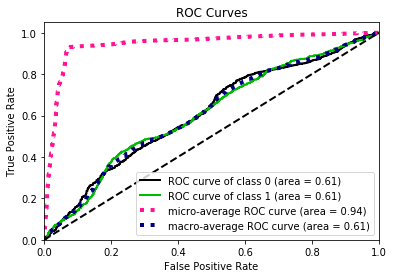

In [11]:
y_proba = lr.predict_proba(X_test)
plt.figure(figsize=(12, 10))
plot_roc(y_test, y_proba)
plt.show()

In [12]:
metrics_summary(y_test, y_pred)
confusion_matrix(y_test, y_pred)

El área bajo la curva ROC es: 0.500575261817554
La exactitud es: 0.9291578947368421
La precisión es: 0.25
El recall es: 0.0014903129657228018
El puntaje F1 es: 0.002962962962962963 



Predicted,0,1
Actual,,
0,8826,3
1,670,1


#### Random Forest

In [13]:
rf = Pipeline([('preprocessing', preprocessing),
               ('estimator', RandomForestClassifier(n_estimators=150, max_depth=5,
                                                    max_features='auto', bootstrap=True,
                                                    oob_score=True, random_state=42))]).fit(X_train, y_train)
y_pred = rf.predict(X_test)

save_model(rf, filename='modelos/random_forest.pkl')

generate_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.93,1.00,0.96,8829.00
1,0.00,0.00,0.00,671.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.46,0.50,0.48,9500.00
weighted avg,0.86,0.93,0.90,9500.00


<Figure size 864x720 with 0 Axes>

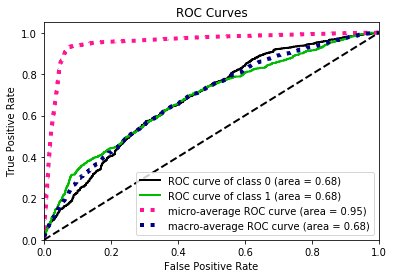

In [14]:
y_proba = rf.predict_proba(X_test)
plt.figure(figsize=(12, 10))
plot_roc(y_test, y_proba)
plt.show()

In [15]:
metrics_summary(y_test, y_pred)
confusion_matrix(y_test, y_pred)

El área bajo la curva ROC es: 0.5
La exactitud es: 0.9293684210526316
La precisión es: 0.0
El recall es: 0.0
El puntaje F1 es: 0.0 



Predicted,0
Actual,
0,8829
1,671


#### Gradient Boosting

In [16]:
gb = Pipeline([('preprocessing', preprocessing),
               ('estimator', GradientBoostingClassifier(learning_rate=0.09, n_estimators=150,
                                                        subsample=0.7, max_depth=5, random_state=42))]).fit(X_train, y_train)
y_pred = gb.predict(X_test)

save_model(gb, filename='modelos/gradient_boosting.pkl')

generate_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.93,0.99,0.96,8829.00
1,0.23,0.02,0.04,671.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.58,0.51,0.50,9500.00
weighted avg,0.88,0.93,0.90,9500.00


<Figure size 864x720 with 0 Axes>

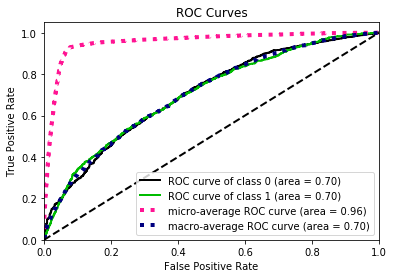

In [17]:
y_proba = gb.predict_proba(X_test)
plt.figure(figsize=(12, 10))
plot_roc(y_test, y_proba)
plt.show()

In [18]:
metrics_summary(y_test, y_pred)
confusion_matrix(y_test, y_pred)

El área bajo la curva ROC es: 0.5077138761151395
La exactitud es: 0.9257894736842105
La precisión es: 0.22580645161290322
El recall es: 0.020864381520119227
El puntaje F1 es: 0.03819918144611187 



Predicted,0,1
Actual,,
0,8781,48
1,657,14


### Construccion de los modelos con SMOTE

In [19]:
global_transformations = Pipeline([('selector', ColumnsSelector())])

numerical_transformations = Pipeline([('selector', ColumnsSelector(variables='numerical')),
                                      ('scaler', StandardScaler()),
                                      ('dataframe', GetDataFrame(variables='numerical'))])

preprocessing = Pipeline([('global', global_transformations),
                          ('features', numerical_transformations)])

In [20]:
X = preprocessing.fit_transform(data)
y = label

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'El conjunto de datos de entrenamiento, tiene {X_train.shape[0]} observaciones, y {X_train.shape[1]} variables. \n')
print(f'El conjunto de datos de prueba, tiene {X_test.shape[0]} observaciones, y {X_test.shape[1]} variables.')

El conjunto de datos de entrenamiento, tiene 28500 observaciones, y 43 variables. 

El conjunto de datos de prueba, tiene 9500 observaciones, y 43 variables.


In [22]:
method = SMOTE(random_state=42)
X_train, y_train = method.fit_sample(X_train, y_train)

#### Regresión Logística

In [23]:
lr = LogisticRegressionCV(cv=5,random_state=42,scoring='roc_auc').fit(X_train, y_train)
y_pred = lr.predict(X_test)

save_model(lr, filename='modelos/logistic_regression_smote.pkl')

generate_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.94,0.60,0.74,8829.00
1,0.09,0.53,0.16,671.00
accuracy,0.60,0.60,0.60,0.60
macro avg,0.52,0.57,0.45,9500.00
weighted avg,0.88,0.60,0.70,9500.00


<Figure size 864x720 with 0 Axes>

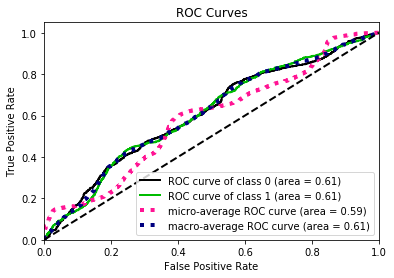

In [24]:
y_proba = lr.predict_proba(X_test)
plt.figure(figsize=(12, 10))
plot_roc(y_test, y_proba)
plt.show()

In [25]:
metrics_summary(y_test, y_pred)
confusion_matrix(y_test, y_pred)

El área bajo la curva ROC es: 0.5672351597052053
La exactitud es: 0.5987368421052631
La precisión es: 0.09239553594601609
El recall es: 0.5305514157973175
El puntaje F1 es: 0.15738284703801944 



Predicted,0,1
Actual,,
0,5332,3497
1,315,356


#### Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators=150, max_depth=5,
                            max_features='auto', bootstrap=True,
                            oob_score=True, random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)

save_model(rf, filename='modelos/random_forest_smote.pkl')

generate_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.96,0.63,0.76,8829.00
1,0.12,0.63,0.20,671.00
accuracy,0.63,0.63,0.63,0.63
macro avg,0.54,0.63,0.48,9500.00
weighted avg,0.90,0.63,0.72,9500.00


<Figure size 864x720 with 0 Axes>

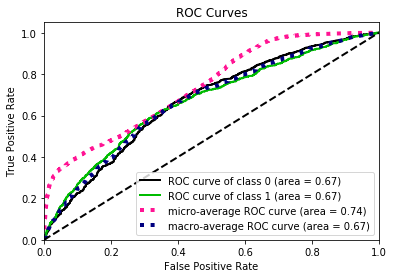

In [27]:
y_proba = rf.predict_proba(X_test)
plt.figure(figsize=(12, 10))
plot_roc(y_test, y_proba)
plt.show()

In [28]:
metrics_summary(y_test, y_pred)
confusion_matrix(y_test, y_pred)

El área bajo la curva ROC es: 0.6322812692692875
La exactitud es: 0.6338947368421053
La precisión es: 0.11579523679167807
El recall es: 0.6304023845007451
El puntaje F1 es: 0.1956521739130435 



Predicted,0,1
Actual,,
0,5599,3230
1,248,423


#### Gradient Boosting

In [29]:
gb = GradientBoostingClassifier(learning_rate=0.09, n_estimators=150,
                                subsample=0.7, max_depth=5, random_state=42).fit(X_train, y_train)
y_pred = gb.predict(X_test)

save_model(gb, filename='modelos/gradient_boosting_smote.pkl')

generate_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.94,0.96,0.95,8829.00
1,0.21,0.13,0.16,671.00
accuracy,0.90,0.90,0.90,0.90
macro avg,0.57,0.55,0.55,9500.00
weighted avg,0.88,0.90,0.89,9500.00


<Figure size 864x720 with 0 Axes>

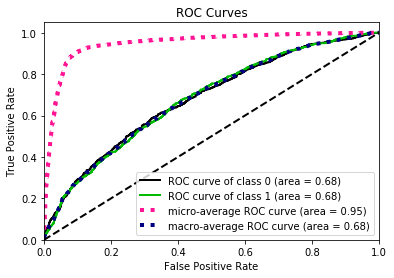

In [30]:
y_proba = gb.predict_proba(X_test)
plt.figure(figsize=(12, 10))
plot_roc(y_test, y_proba)
plt.show()

In [31]:
metrics_summary(y_test, y_pred)
confusion_matrix(y_test, y_pred)





El área bajo la curva ROC es: 0.5452817812320494
La exactitud es: 0.9034736842105263
La precisión es: 0.20574162679425836
El recall es: 0.12816691505216096
El puntaje F1 es: 0.15794306703397612 



Predicted,0,1
Actual,,
0,8497,332
1,585,86
